<font size="5">Data analysis</font>


This Jupyter notebook is used to analyze and interpret the processed data. For the vizualization, we will mainly use the plotly package which is a very popular interactive, open source plotting library. Our main goal is to compare the job availability and salaries across different categories of IT for Czech people. For the purposes of this analysis, the cleaned data from the 10th of May was utilized, because as we are finishing this project in the August, the number of job offers has rapidly decreased from 700 in May to only 100 for today.



In [1]:
import pandas as pd
import numpy as np

import plotly as py
import matplotlib.pyplot as plt
import plotly.express as px

from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

/Users/leducanh/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


**Viewing data**

In [2]:
df = pd.read_csv('cleaned_data.csv', index_col=0, skipinitialspace=True)

In [5]:
pipreqsnb --print


NameError: name 'pipreqsnb' is not defined

In [3]:
df.head()

jobTitles     seniority       workLanguage  angličtina  \
0   Java Software Developer         Junior         angličtina        True   
1             C++ Developer   Mid Advanced              česky       False   
2              C# Developer   Mid Advanced              česky       False   
3  Java developer u Medvědů   Mid Advanced              česky       False   
4  Senior Backend Developer   Mid Advanced  česky, angličtina        True   

   česky                                           location  \
0  False                                                NaN   
1   True   Prague, Altajská 1568/4 (Po pandemi)• Prague,...   
2   True   Prague, Altajská 1568/4 (Po pandemi)• Prague,...   
3   True     Praha, Vítkova 241/10 • Praha, Vítkova 241/10    
4   True   Praha, Rohanské nábř. 19 • Remote• Praha, Roh...   

             remoteAdj    salAvg category mainProgLangAdj  
0               Remote   29050.0  Backend            java  
1  Hybrid or no remote  105000.0  Backend           other  
2  Hybrid or no remote  105000.0  Backend           other  
3  Hybrid or no remote   90000.0  Backend            java  
4               Remote   80000.0  Backend            node

**Basic job info**

In this section we will try to get some basic info about the job offers. We will start with a word map which shows the most frequently used words in job titles. As could be seen from the picture, general words in the IT world such as developer, software or engineer as well as programming languages such as java, react or python are represented in large number of job titles. Remote is also very frequently used, which suggests that most of the jobs are on remote basis.

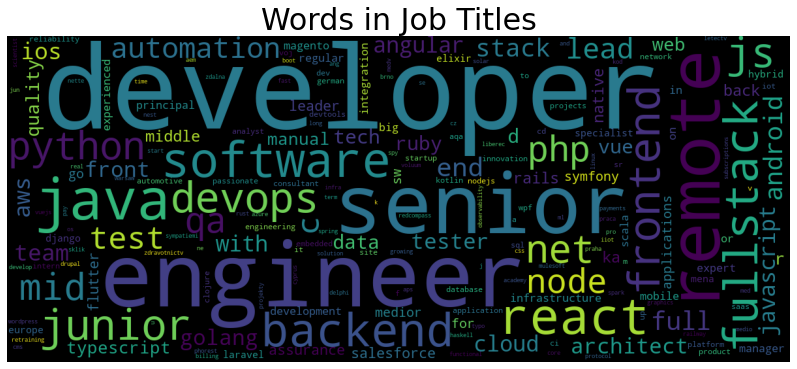

In [4]:
job_title = []
for i in range(df.shape[0]):
    job_title.append(df['jobTitles'].iloc[i])
job_corpus = " ".join(job_title)
job_corpus = re.findall('[a-zA-Z]+',job_corpus.lower())
job_corpus = dict(Counter(job_corpus))

wc = WordCloud(width=1200, height=500,)
word_img = wc.generate_from_frequencies(job_corpus)

plt.figure(figsize=(15,6))
plt.imshow(word_img,cmap='Accent')
plt.axis('off')
plt.title("Words in Job Titles",fontdict={'fontsize':30})
plt.show()

By looking at the next word map, we could observe that most of the jobs are offered in Czech and Polish large cities, namely Prague, Krakow, Warsaw or Brno. Given that large number of job offers come from Poland, this may explain why majority of jobs operate on remote basis or why English is heavily demanded in the workplaces as shown on the Remote ratio and Required language ratio bar charts, respectively.

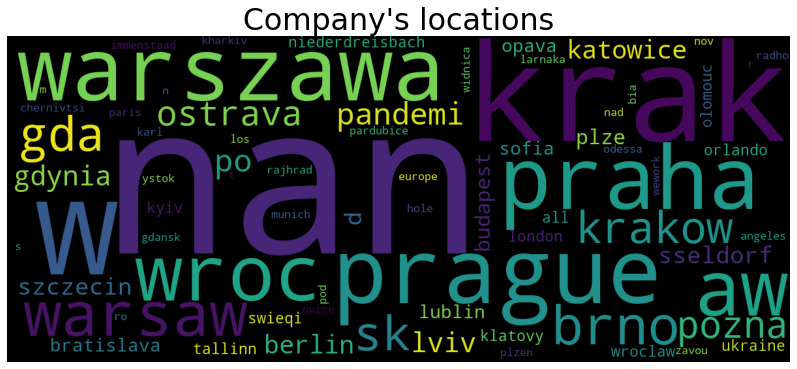

In [5]:
job_loc = []
#leaving just first adress in location for simplification
df["location"]=df["location"].str.split(",").str[0]
df["location"]=df["location"].str.split("•").str[0]
for i in range(df.shape[0]):
    job_loc.append(str(df['location'].iloc[i]))
job_corpus = " ".join(job_loc)
job_corpus = re.findall('[a-zA-Z]+',job_corpus.lower())
job_corpus = dict(Counter(job_corpus))

wc = WordCloud(width=1200, height=500,)
word_img = wc.generate_from_frequencies(job_corpus)

plt.figure(figsize=(15,6))
plt.imshow(word_img,cmap='Accent')
plt.axis('off')
plt.title("Company's locations",fontdict={'fontsize':30})
plt.show()

# It would be also good to show word map of the required skills demanded, unfortunately we didn't managed to scrape this info at the time of making the big job offer dataset

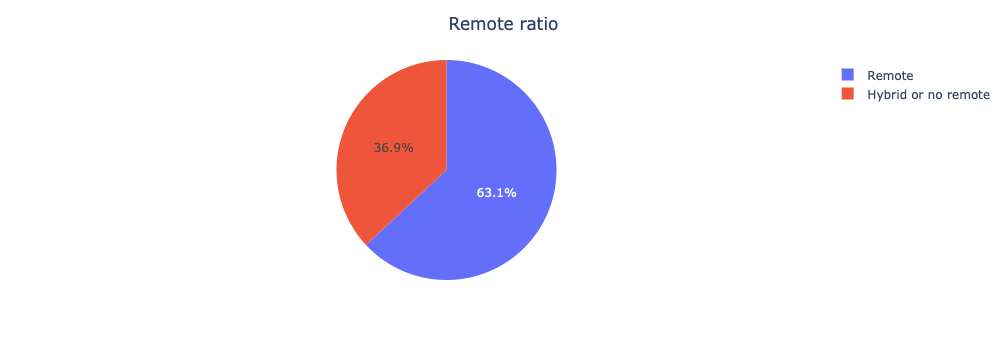

In [6]:
#pie chart for main prog lang
fig = px.pie(df['remoteAdj'].value_counts().reset_index().head(5), names = 'index', values = 'remoteAdj')
fig.update_layout(title_text='Remote ratio', title_x=0.5)
fig.show()

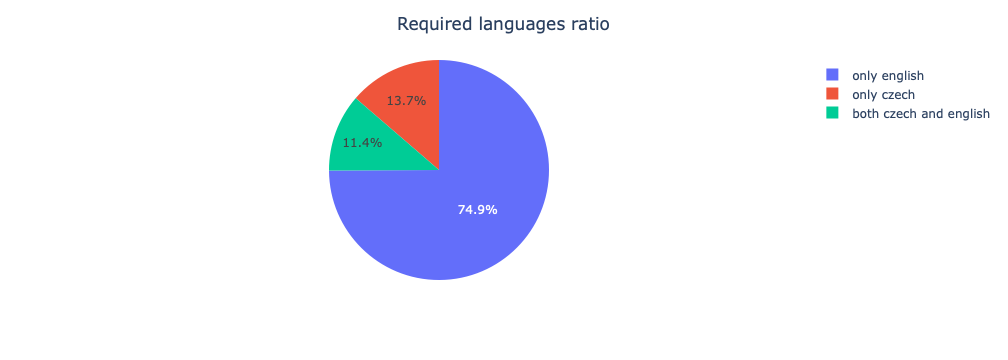

In [7]:
#pie chart for required working languages
fig = px.pie(df.groupby(['angličtina', 'česky']).size(),values = df[['angličtina', 'česky']].value_counts(), names = ['only english','only czech','both czech and english'])
fig.update_layout(title_text='Required languages ratio', title_x=0.5)
fig.show()

**Job requirements**

Among the IT categories, applicants with backend background are by far the most demanded, followed by frontend and fullstack (backend + frontend) background. For the backend jobs, the most required programming languages are java, python and php while for the frontend jobs, the top programming languages are react and javascript. Not surprisingly, these mentioned programming languages are also among the most demanded in the job market, starting from Java, which is heavily used in backend positions, followed by python which is on the other hand very versatile as it could be additionaly applied in DevOps or Testing positions, and further followed by javascript.

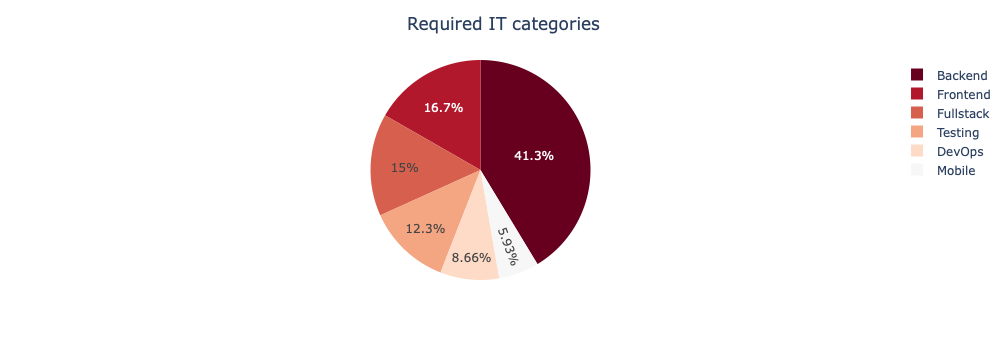

In [8]:
fig = px.pie(df['category'].value_counts().reset_index(), names = 'index', 
             values = 'category',color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Required IT categories', title_x=0.5)
fig.show()

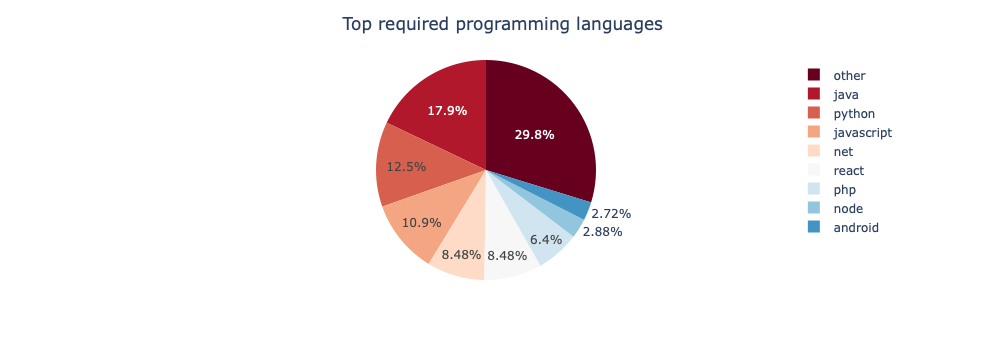

In [9]:
#pie chart for main prog lang
fig = px.pie(df['mainProgLangAdj'].value_counts().reset_index(), names = 'index', values = 'mainProgLangAdj',
            color_discrete_sequence=px.colors.sequential.RdBu)
fig.update_layout(title_text='Top required programming languages', title_x=0.5)
fig.show()

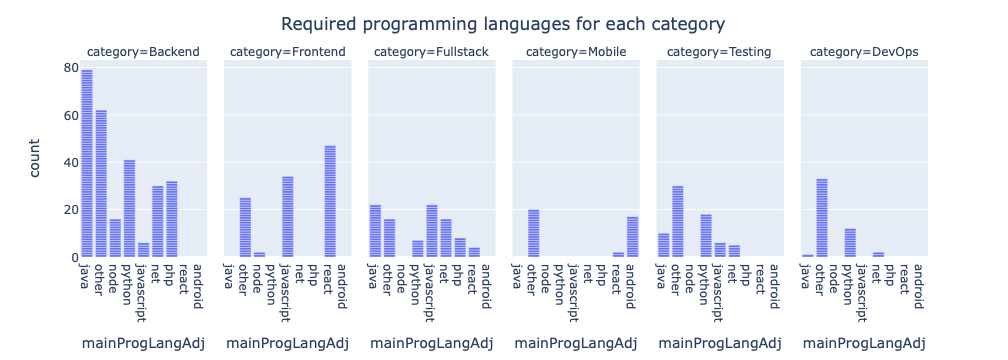

In [10]:
# sort the df by seniority for better vizualization
fig = px.bar(df, x = "mainProgLangAdj", facet_col = 'category', facet_col_wrap = 6)
fig.update_layout(title_text = 'Required programming languages for each category', title_x = 0.5)
fig.show()

Regarding the seniority levels, most companies prefer applicants with more senior experience but still, a lot of mid level jobs are available. The same cannot be said about junior level jobs. If we compare the required seniority for each programming category, we could observe that in relative terms, backend , fullstack, and devOps are very demanding of the applicants experience, whereas frontend, testing, and mobile categories are more available for junior to mid level applicants. We get consistent results if we look at the required experience for each programming language, where jobs with backend based languages as java, node or python require more senior level applicants, whereas jobs with frontend based languages as javascript or react are more opened to less experienced applicants. That being said, in the absolute terms (total jobs offers),the java, javascript, python, and react languages have comparatively similar number of offers for junior to mid level applicants. Whereas most senior offers could be found for java and python.

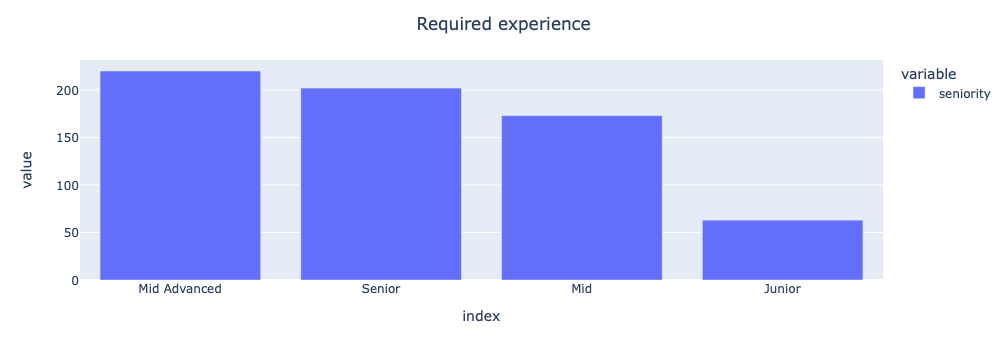

In [11]:
#fig = px.bar(df['seniority'].value_counts().reset_index(), x = 'seniority', y = 'index', labels = {'index': 'seniority'})
fig = px.bar(df['seniority'].value_counts())
fig.update_layout(title_text = 'Required experience', title_x = 0.5)
fig.show()

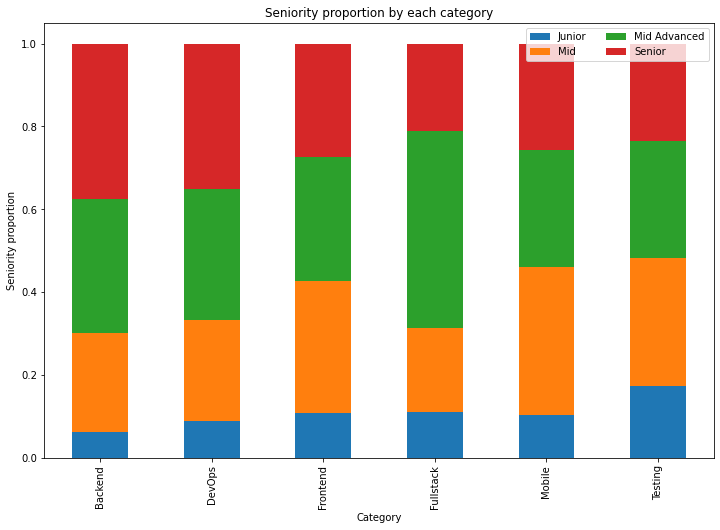

In [12]:
cross_tab_prop = pd.crosstab(index=df['category'],
                             columns=df['seniority'],
                             normalize="index")
#px.bar(cross_tab_prop, x = "mainProgLangAdj", color =  'seniorityCat', barmode = 'stack')
cross_tab_prop.plot(kind='bar', 
                    stacked=True,  
                    figsize=(12, 8))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Category")
plt.ylabel("Seniority proportion")
plt.title('Seniority proportion by each category')
plt.show()

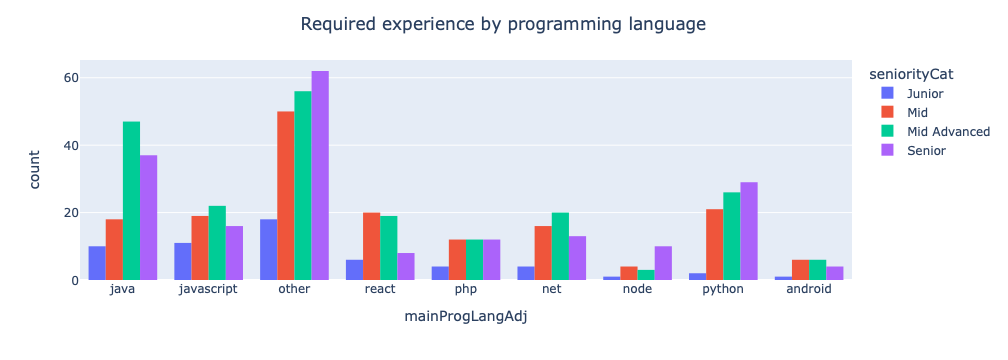

In [13]:
# sort the df by seniority for better vizualization
df['seniorityCat'] = df['seniority'].astype('category')
df['seniorityCat'] = df["seniorityCat"].cat.set_categories(["Junior",'Mid', 'Mid Advanced', 'Senior'], ordered=True)
df.sort_values(['seniorityCat'],ascending=[True],inplace=True)
#fig = px.bar(df, x = "mainProgLangAdj", color =  'seniorityCat', barmode = 'group')
fig = px.histogram(df, x = "mainProgLangAdj", color =  'seniorityCat', barmode = 'group')
fig.update_layout(title_text = 'Required experience by programming language', title_x = 0.5)
fig.show()

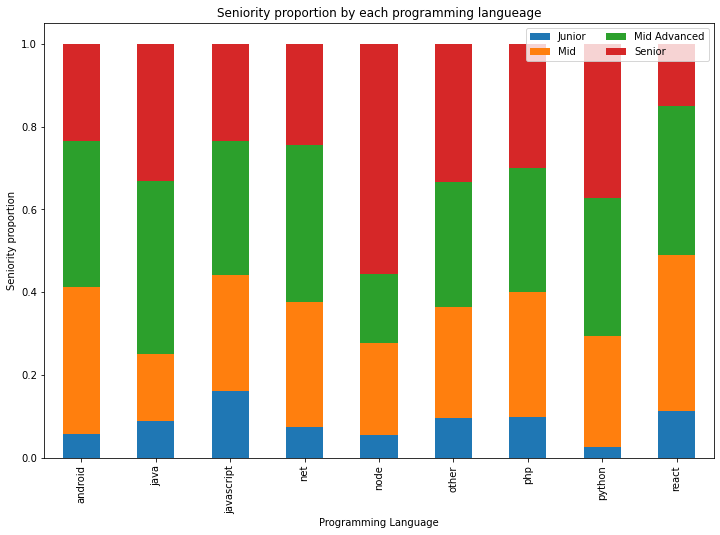

In [14]:
cross_tab_prop = pd.crosstab(index=df['mainProgLangAdj'],
                             columns=df['seniority'],
                             normalize="index")
#px.bar(cross_tab_prop, x = "mainProgLangAdj", color =  'seniorityCat', barmode = 'stack')
cross_tab_prop.plot(kind='bar', 
                    stacked=True,  
                    figsize=(12, 8))

plt.legend(loc="upper right", ncol=2)
plt.xlabel("Programming Language")
plt.ylabel("Seniority proportion")
plt.title('Seniority proportion by each programming langueage')
plt.show()

#consistent with the chart below - programming languages used for backend are not begginer friendly

**Salary comparison**

If we check the salary distributions across different job categories, we could confirm that most of them follow more or less the normal distribution. Backend and devOps seem to be the best paid categories and their distributions are heavily concentrating around the 100K salary value. Other categories are being paid slightly less as their distributions are concentrating on the 80K salary value. To also being able to control for seniority levels, we will make use of heatmaps. We could observe that at the junior level, frontend and testing jobs are best paid with average salary over 50K, while junior fullstack and mobile jobs are underpaid with average salary below 40k. However opposite happens as we move toward higher seniority levels, where frontend and testing jobs are being underpaid in comparison to other categories. The most profitable category is clearly devOps, where senior applicants enjoy a salary of over 145K and this is followed by backend and fullstack senior positions with salaries around 125K.
    

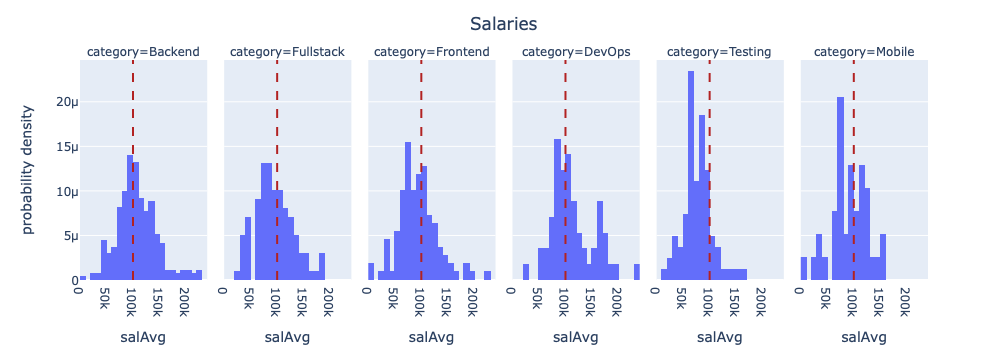

In [15]:
fig = px.histogram(df, x = 'salAvg', facet_col = 'category',histnorm='probability density')
fig.update_layout(title_text = 'Salaries', title_x = 0.5)
fig.add_vline(x=100000, line_dash = 'dash', line_color = 'firebrick')
fig.show()

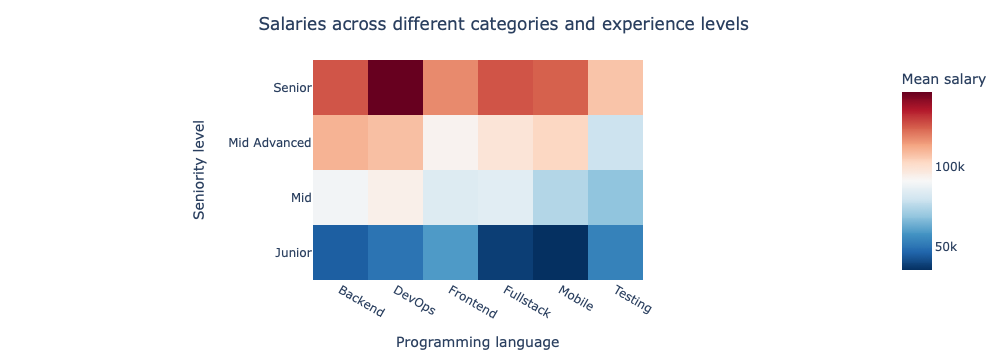

In [16]:
#heat map

cross_tab_prop = pd.crosstab(index=df['seniority'],
                             columns=df['category'],
                             values=df["salAvg"],
                            aggfunc = np.mean
                            ).sort_values('seniority', ascending = False)
fig = px.imshow(cross_tab_prop,
               labels=dict(x = "Programming language", y = "Seniority level", color = "Mean salary"),
               color_continuous_scale='RdBu_r')
fig.update_layout(title_text= "Salaries across different categories and experience levels", title_x = 0.5)
fig.show()

We have also generated a heatmap for programming languages. Clearly the best programming languages for junior level applicants, in terms of offered salary, is react with a avarage salary around 75K. This is followed by python and javascript with average salaries  over 50K for junior applicants, while the rest offer salaries around 40K. As we move toward the mid levels, main frontend languages react and javascript become slightly underpaid, while average salaries for main backend languages java and python  significantly increase. At the senior levels, if we will not inlude the 'other' language category, then the android, java, and javascript are being paid the most with salaries around 130K, while the rest is being paid around 110K. The 'other' languages category is paying the most at senior level with average salary over 135K and the possible reason is that contains many devOps languages such as Golang or C++ which are being paid really well. 

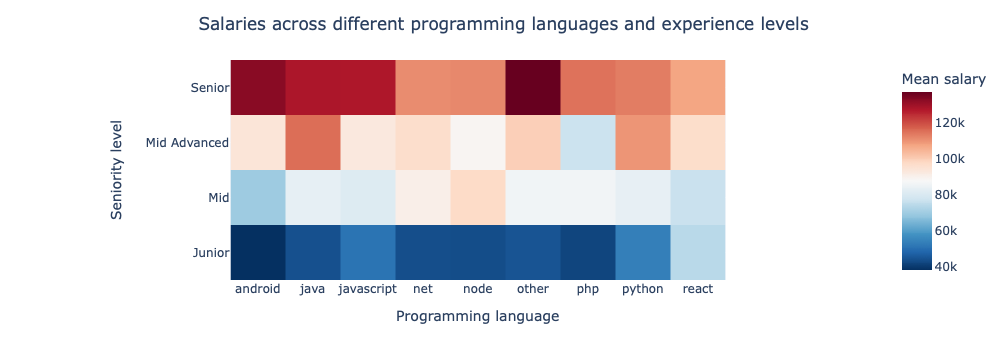

In [17]:
#heat map

cross_tab_prop = pd.crosstab(index=df['seniority'],
                             columns=df['mainProgLangAdj'],
                             values=df["salAvg"],
                            aggfunc = np.mean
                            ).sort_values('seniority', ascending = False)
fig = px.imshow(cross_tab_prop,
               labels=dict(x = "Programming language", y = "Seniority level", color = "Mean salary"),
               color_continuous_scale='RdBu_r')
fig.update_layout(title_text= "Salaries across different programming languages and experience levels", title_x = 0.5)
fig.show()

**Summary**

After the examination of data, we conclude that backend is by far the most demanded (most open job positions) it category in the job market. However, it is simultaneously with devOps and fullstack the most demanding category in terms of required experience. The second most demanded category is frontend, which sets much less demand on the applicants' experience. The most friendly category for junior to mid level applicants is the testing category. 

The most demanded programming languages are java and python. Java is the most used language for backend, whereas python is very versatile, but despite their popularity, a lot of experience is demanded for these two languages in the job market. For the junior to mid level applicants the most available among the popular languages are javascript and react. 

Regadring salaries, backend and devOps are most well paid categories, where junior applicants are paid relatively less in comparison to other categories, however the average salaries start to rapidly grow with more experience. On the other hand, frontend and testing categories offer higher salaries for less senior people, but the average salaries grow much slower as we move toward more senior levels. 

Consistent findings could be found for programming languages, where more backend based and devOps languages such as java or net pay initially less, but the salaries grow faster with gained experience, whereas the opposite trend could be found for frontend languages, with the exception for senior javascript applicants, who can enjoy top salary. Python, which is applied across many it categories is inbetween these two trends. 

To sum it up, we could observe a clear trend that IT categories and programming languages, which are friendly for less experienced applicants in terms of required experience and salary are also paying the least at the higher seniority levels and vice versa. However, some exception could be found as for javascript jobs, which pay a lot for junior and senior levels but relatively little for mid levels, or python jobs which are somewhere in the middle of both mentioned trends possibly due to the python versatility. 



